In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('assessments.csv')
df2 = pd.read_csv('courses.csv')
df3 = pd.read_csv('studentAssessment.csv')
df4 = pd.read_csv('studentRegistration.csv')

## Задание 1: Сколько студентов успешно сдали только один курс?

In [99]:
# создаю необходимый для решения задания датафрейм

full_data = df1.merge(df3, how = 'right',  on = 'id_assessment' ).merge(df4, how = 'right')

In [100]:
full_data.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration
0,AAA,2013J,1752.0,TMA,19.0,10.0,11391,18.0,0.0,78.0,-159.0,NaN
1,AAA,2013J,1753.0,TMA,54.0,20.0,11391,53.0,0.0,85.0,-159.0,NaN
2,AAA,2013J,1754.0,TMA,117.0,20.0,11391,115.0,0.0,80.0,-159.0,NaN
3,AAA,2013J,1755.0,TMA,166.0,20.0,11391,164.0,0.0,85.0,-159.0,NaN
4,AAA,2013J,1756.0,TMA,215.0,30.0,11391,212.0,0.0,82.0,-159.0,NaN


In [101]:
# проверяем, что экзамен не перезачелся ни одному студенту, значит этих студентов можно не учитывать в расчете

full_data.query("assessment_type == 'Exam' and is_banked == 1")

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration


In [6]:
# создаем датафрейм со студентами, которые сдали хотя бы 1 экзамен и считаем, сколько раз в списке встретился студент

students = full_data.query("assessment_type == 'Exam' and score >= 40").value_counts('id_student').reset_index()

In [7]:
# корректно обозначаем результирующую колонку

students.columns = ['id_student', 'good_attempts']

In [8]:
# отбираем студентов, сдавших только 1 экзамен

one_exam_students = students.query("good_attempts == 1")

In [9]:
# считаем количество таких студентов

one_exam_students['good_attempts'].sum()

3802

## Вывод:

**Сдали только 1 экзамен 3802 студента**



## Задание 2: Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью

In [10]:
# количество всех попыток сдать экзамен с группировкой по коду предметов (курсов) и коду экзамена

df_exams_full = full_data.query( "assessment_type == 'Exam'").groupby(['code_module', 'id_assessment']).agg({'id_student':'count'}).reset_index()

In [11]:
# количество успешных попыток сдать экзамен с группировкой по коду предметов (курсов) и коду экзамена

df_exams_complete = full_data.query( "assessment_type == 'Exam' and score >= 40").groupby(['code_module', 'id_assessment']).agg({'id_student':'count'}).reset_index()

In [109]:
df_exams_full = df_exams_full.rename(columns = {'id_student':'attempts'}) # присваиваю корректное название колонке

In [13]:
df_exams_complete = df_exams_complete.rename(columns = {'id_student':'good_attempts'}) # присваиваю корректное название колонке

In [14]:
# соединяем таблички в одну для удобства

df_exams_attempts = df_exams_complete.merge(df_exams_full, how = 'inner', on=['code_module','id_assessment']) 

In [15]:
# создаем колонку с завершаемостью

df_exams_attempts['completion'] = (df_exams_attempts.good_attempts/df_exams_attempts.attempts).round(2)

In [16]:
df_exams_attempts.sort_values('completion', ascending = False)

,code_module,id_assessment,good_attempts,attempts,completion
4,DDD,25361.0,485,524,0.93
3,DDD,25354.0,878,968,0.91
0,CCC,24290.0,664,747,0.89
5,DDD,25368.0,842,950,0.89
1,CCC,24299.0,1019,1168,0.87
2,DDD,25340.0,504,602,0.84


## Вывод:

**Экзамены проводятся только по предметам с кодами CCC и DDD**

Для курса с кодом **CCC** самым сложным оказался экзамен с кодом **24299** (его показатель завершаемости равен **0.87**), а самым простым экзамен с кодом **24290** (его показатель завершаемости равен **0.89**). 

Для курса с кодом **DDD** самым сложным оказался экзамен с кодом **25340** (его показатель завершаемости равен **0.84**), а самым простым экзамен с кодом **25361** (его показатель завершаемости равен **0.93**)

## Задание 3: По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом)

In [17]:
# срок сдачи теста студентом, измеряемый как количество дней с начала семестра отражен в столбце date_submitted

In [18]:
# создаем датафрейм со всеми успешными попытками сдать экзамен, так как успешно сданный экзамен уже является последним

last_exams = full_data.query( "assessment_type == 'Exam' and score >= 40")

In [19]:
# группируем данные по предмету и экзамену и считаем средний срок сдачи экзамена

mean_date = last_exams.groupby(['code_module', 'id_assessment']).agg({'date_submitted':'mean'}).round(1).sort_values('date_submitted', ascending = True).reset_index()

In [20]:
mean_date

,code_module,id_assessment,date_submitted
0,DDD,25340.0,230.2
1,CCC,24290.0,231.6
2,DDD,25361.0,234.9
3,DDD,25354.0,239.5
4,DDD,25368.0,242.8
5,CCC,24299.0,244.4


## Вывод:

Для курса с кодом **CCC** минимальный срок сдачи экзамена зафиксирован для экзамена с номером **24290**, 
что логично, ведь в прошлом задании мы выяснили, что этот экзамен оказался самым простым в курсе. Максимальное время сдачи экзамена зафиксировано для теста с номером **24299**, что тоже логично, ведь он является самым сложным в курсе. 

Для курса с кодом **DDD** минимальный срок сдачи экзамена зафиксирован для экзамена с номером **25340**, 
что нетипично, ведь в прошлом задании мы выяснили, что этот экзамен оказался самым сложным в курсе. Максимальное время сдачи экзамена зафиксировано для теста с номером **25368**, что вполне логично, ведь он является вторым по сложности в курсе.




## Задание 4: Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

### **В процессе анализа данных я обнаружил, что некоторые студенты имеют NaN значение в поле date_registration и решил с этим разобраться, пришел к следующим выводам:**

- Колонка **date_unregistration** отражает то, что студент отменил регистрацию (либо окончил курс при NaN-значении), это означает, что студент в любом случае регистрировался на курсе, так как незарегистрированный пользователь не может отменить регистрацию и тем более окончить курс

- В расчете решил учитывать NaN-значения поля **date_registration** вне зависимости от значения в поле **date_unregistration** так как считаю, что мы выявляем популярность предмета, а сам факт регистрации на нем (пусть и с последующей отменой) показывает, что курс интересен студентам

- Также, пришел к выводу о том, что чаще всего NaN-значения поля **date_registration** возникают в случае, когда студент проходил обучение на курсе в другом семестре. Вероятно, механизм регистрации на сайте курса был недостаточно отлажен и логи с датой регистрации пользователей записывались с ошибками, что приводило к появлению NaN-значений



In [21]:
# считаем количество регистраций по каждому курсу и выводим ТОП-3 по количеству регистраций

df4.groupby('code_module')\
   .agg({'date_registration':'count'})\
   .sort_values('date_registration', ascending = False)\
   .reset_index()\
   .head(3)

,code_module,date_registration
0,BBB,7900
1,FFF,7751
2,DDD,6257


### Данные в столбце **date_unregistration** также имеют NaN-значения, но, по условию, это означает, что студент окончил курс. NaN-значения поля **date_unregistration** не являются показателем оттока студентов с курса, а поэтому учитываться **не будут**

In [22]:
# отбираем нужные значение и считаем количество отмененных регистраций по каждому курсу, 
# выводим ТОП-3 по отменам

df4.query("date_unregistration != 'NaN'")\
   .groupby('code_module')\
   .agg({'date_unregistration':'count'})\
   .sort_values('date_unregistration', ascending = False)\
   .reset_index()\
   .head(3)

,code_module,date_unregistration
0,FFF,2380
1,BBB,2377
2,DDD,2235


## Вывод:

На курс **BBB** зарегистрировалось наибольшее количество студентов, а именно 7900 человек

На курс **FFF** отменило регистрацию наибольшее количество студентов, а именно 2380 человек

## Задание 5: В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

Известно, что курс считается завершенным, если по нему получен зачет за экзамен, поэтому отфильтруем данные по попыткам сдать экзамен

In [23]:
df_assessments = df1.merge(df3, how = 'right', on = 'id_assessment')

In [24]:
# проверяем, что экзамен не перезачелся ни одному студенту, значит этих студентов можно не учитывать в расчете

df_assessments.query("assessment_type == 'Exam' and is_banked == 1")

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score


In [102]:
# создаем датафрейм со всеми попытками сдать экзамены

df_exam_allattempts = df_assessments.query("assessment_type == 'Exam'")\
                                    .groupby('code_presentation')\
                                    .agg({'score':'count'})\
                                    .reset_index()

In [103]:
# создаем датафрейм со всеми УСПЕШНЫМИ попытками сдать экзамены

df_exam_goodattempts = df_assessments.query("assessment_type == 'Exam' and score >= 40")\
                                     .groupby('code_presentation')\
                                     .agg({'score':'count'})\
                                     .reset_index()

In [107]:
# создаем датафрейм в котором считаем среднее время СДАЧИ экзаменов по курсу

df_dates = df_assessments.query("assessment_type == 'Exam' and score >= 40")\
              .groupby('code_presentation')\
              .agg({'date_submitted':'mean'})\
              .round(2)\
              .reset_index()

In [160]:
# объединяем полученные таблицы в одну для удобства интерпретации данных

df_for_step = df_exam_allattempts\
              .merge(df_exam_goodattempts, on='code_presentation')\
              .merge(df_dates, on='code_presentation')

In [111]:
df_for_step = df_for_step.rename(columns = {'score_x':'attempts'}) # присваиваю корректное название колонке

In [112]:
df_for_step = df_for_step.rename(columns = {'score_y':'good_attempts'}) # присваиваю корректное название колонке

In [113]:
# считаем завершаемость, для более интуитивной интерпретации перевожу значения в проценты

df_for_step['completion'] = (df_for_step.good_attempts / df_for_step.attempts)*100

In [115]:
# сортируем значения

df_for_step.sort_values(['date_submitted', 'completion'], ascending = False)

,code_presentation,attempts,good_attempts,date_submitted,completion
3,2014J,2118,1861,243.68,87.865911
1,2013J,968,878,239.51,90.702479
2,2014B,1271,1149,233.00,90.401259
0,2013B,602,504,230.16,83.720930


## Вывод:

**Экзамены проводятся только по предметам с кодами CCC и DDD**

Для семестра с кодом **2014J** выявлен самый большой срок сдачи экзаменов и составил **243.68** дней от начала семестра

Для семестра с кодом **2013B** выявлена самая низкая завершаемость курса, она составила **84%** 

## Задание 6: Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [33]:
full_assessment = df1.merge(df3, how = 'left', on = 'id_assessment')

In [116]:
# посчитал среднее время до попытки сдать экзамен, тем самым просчитав метрику Recency

df_r = full_assessment.query("assessment_type == 'Exam'")\
               .groupby('id_student')\
               .agg({'date_submitted':'mean'})\
               .reset_index()

В следующем блоке приступил к расчету Frequency (завершаемости курсов)

In [123]:
# расчет количества курсов, на которые зарегистрировался студент

df_registr = df4.groupby(['id_student']).agg({'code_module':'count'}).reset_index()

In [124]:
# рассчитал количество курсов, которые окончил студент
# в условии у проекту указано, что значение NaN в колонке date_unregistration означает, что студент окончил курс

df_compl = df4.query("date_unregistration == 'NaN'").groupby(['id_student']).agg({'code_module':'count'}).reset_index()

In [125]:
df_registr = df_registr.rename(columns = {'code_module':'registration'}) # присваиваю корректное название колонке

In [135]:
df_compl = df_compl.rename(columns = {'code_module':'complete'}) # присваиваю корректное название колонке

In [136]:
# объединяем полученные таблицы в одну для удобства интерпретации данных

df_comleted_courses = df_compl.merge(df_registr)

In [137]:
#  вычисляем завершаемость по каждому студенту

df_comleted_courses['completion'] = (df_comleted_courses.complete/df_comleted_courses.registration)*100

In [138]:
# удаляю лишние колонки, которые не нужны для анализа

df_comleted_courses = df_comleted_courses.drop(columns = ['registration', 'complete'], axis = 1)

In [139]:
df_f = df_comleted_courses

  В предыдущих заданиях мы считали завершаемость курса путем вычисления отношения количества успешных попыток сдать экзамен к общему количеству попыток. В этом задании я рассчитал завершаемость курсов для каждого студента, а именно: посчитал общее количество курсов, на которые студент зарегистрировался, также рассчитал количество курсов, которые студент успешно сдал, а следовательно закончил курс. 
  Например: студент зарегистрировался на 3 курсах, но успешно окончил только по 2, значит его завершаемость курсов составит 2/3. Считаю, что раз мы проводим анализ АУДИТОРИИ, то и метрики, выбранные для проведения анализа должны относиться именно к аудитории.

In [140]:
# посчитал средние баллы за экзамен, тем самым рассчитал метрику Monetary 

df_m = full_assessment.query('assessment_type == "Exam"').groupby('id_student').agg({'score':'mean'}).reset_index()

In [141]:
# объединил результаты расчета метрик в один датафрейм

df_rfm = df_r.merge(df_f, how = 'left', on = 'id_student').merge(df_m).rename(columns = {'date_submitted':'Recency', 'completion':'Frequency', 'score':'Monetary'})

In [142]:
df_rfm.head()

,id_student,Recency,Frequency,Monetary
0,23698.0,243.0,100.0,80.0
1,24213.0,236.0,50.0,58.0
2,27116.0,243.0,100.0,96.0
3,28046.0,237.0,100.0,40.0
4,28787.0,243.0,100.0,44.0


In [149]:
# получаем границы метрик recency, frequency и monetary для каждого кластера методом деления на 20% квантили

quintiles = df_rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'Frequency': {0.2: 100.0, 0.4: 100.0, 0.6: 100.0, 0.8: 100.0},
 'Monetary': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0}}

In [150]:
# функции присвоения рангов 

def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5 

In [151]:
# присваиваем ранги каждому значению в датафрейме

df_rfm['R'] = df_rfm['Recency'].apply(lambda x: r_score(x))
df_rfm['F'] = df_rfm['Frequency'].apply(lambda x: f_score(x, 'Frequency'))
df_rfm['M'] = df_rfm['Monetary'].apply(lambda x: m_score(x, 'Monetary'))

In [154]:
# добавляем колонку с результатами присвоения рангов

df_rfm['RFM Score'] = df_rfm['R'].map(str) + df_rfm['F'].map(str) + df_rfm['M'].map(str)

In [155]:
df_rfm.head()

,id_student,Recency,Frequency,Monetary,R,F,M,RFM Score
0,23698.0,243.0,100.0,80.0,2,1,4,214
1,24213.0,236.0,50.0,58.0,4,1,2,412
2,27116.0,243.0,100.0,96.0,2,1,5,215
3,28046.0,237.0,100.0,40.0,4,1,1,411
4,28787.0,243.0,100.0,44.0,2,1,1,211


Я собираюсь работать с 9 сегментами на основе результатов только R и M, так как метрика F отработала так, что более 80% студентов имеют 100% завершаемость курса. Вот описание сегментов:

1. **"Мечта преподавателя"** - быстрый, имеет высокий балл за экзамены
2. **"Талантливый трудяга"** - средняя скорость, имеет высокий балл за экзамены
3. **"Любит подумать"** - низкая скорость, имеет высокий балл за экзамены
4. **"Хорошист"** - быстрый, имеет средний балл за экзамены 
5. **"Трудяга"** - средняя скорость, имеет средний балл за экзамены 
6. **"Асфальтовый каток"** - низкая скорость, имеет средний балл за экзамены 
7. **"Торопыга"** - быстрый, имеет низкий балл за экзамены
8. **"Переволновался"** - средняя скорость, имеет низкий балл за экзамены
9. **"Всегда согласен на тройку"** - низкая скорость, имеет низкий балл за экзамены



Разбил аудиторию на сегменты, основанные на показателях скорости сдачи курса и средних баллах за экзамены, так как считаю, что эти две метрики позволяют создать приблизительный портрет студента. Также, изначально хотел еще использовать метрику завершаемости курсов студентами, но она оказалась практически неинформативной, так как разбить ее на адекватные квантили не удалось и все студенты получили ранг [1].

In [158]:
# создал колонку в датафрейме, в которой будет показываться "характеристика" студента

segt_map = {
    r'[4-5]5': 'Мечта преподавателя',
    r'[2-3]5': 'Талантливый трудяга',
    r'15': 'Любит подумать',
    r'[4-5][3-4]': 'Хорошист',
    r'[2-3][3-4]': 'Трудяга',
    r'1[3-4]': 'Асфальтовый каток',
    r'[4-5][1-2]': 'Торопыга',
    r'[2-3][1-2]': 'Переволновался',
    r'1[1-2]': 'Всегда согласен на тройку',
}

df_rfm['Segment'] = df_rfm['R'].map(str) + df_rfm['M'].map(str)
df_rfm['Segment'] = df_rfm['Segment'].replace(segt_map, regex=True)
df_rfm.head()

,id_student,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,23698.0,243.0,100.0,80.0,2,1,4,214,Трудяга
1,24213.0,236.0,50.0,58.0,4,1,2,412,Торопыга
2,27116.0,243.0,100.0,96.0,2,1,5,215,Талантливый трудяга
3,28046.0,237.0,100.0,40.0,4,1,1,411,Торопыга
4,28787.0,243.0,100.0,44.0,2,1,1,211,Переволновался


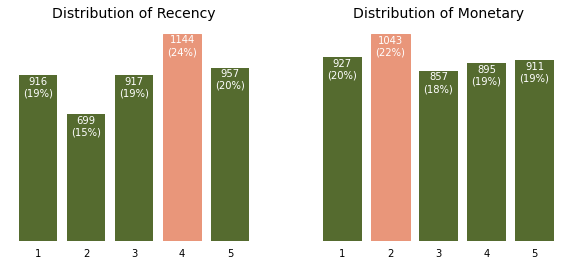

In [159]:
# график распределения студентов по скорости сдачи курсов и средним баллам за экзамен

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'M']):
    parameters = {'R':'Recency', 'M':'Monetary'}
    y = df_rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='darkolivegreen')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('darksalmon')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

По графикам распреления студентов можно сделать вывод о том, что 63% студентов сдают экзамены довольно быстро, но в то же время 42% студентов сдают экзамены на низкие баллы.

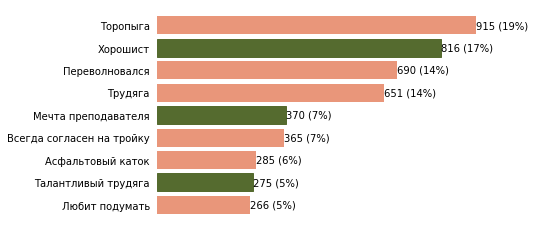

In [161]:
# график распределения студентов по кластерам

segments_counts = df_rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='darksalmon')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Мечта преподавателя', 'Талантливый трудяга', 'Хорошист']:
            bar.set_color('darkolivegreen')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

## Вывод по проекту и мои гипотезы:

Исходя из результатов анализа аудитории можно сделать выводы о том, что большое количество студентов спешат закончить курсы и поэтому набирают мало баллов на экзамене.

Мои гипотезы заключаются в том, что вероятно, на курсе слишком жесткие дедлайны, что приводит к тому, что студенты, которые накопили "хвосты" по темам, пытаются закрыть их уже в то время, которое следовало посвятить подготовке к экзамену. Также могу предположить, что может быть времени, отведенного на сдачу экзамена, недостаточно для его качественного решения. Еще одна гипотеза заключается в том, что курс "сырой" и требует поиска большого количества дополнительной информации для качественной подготовке к сдаче экзамена, а я сам, как недавний студент, знаю, что искать и тем более читать дополнительную информацию, просто лень)

На графике распределения студентов по кластерам выделил зеленым цветом те кластеры, в которые студентам необходимо стремиться. Со стороны преподавателей повысить показатели принадлежности студентов к "нужным" кластерам можно путем небольшого послабления в дедлайнах, включения "дополнительных" материалов в основной курс или пересмотреть задания в экзамене.

